# Toolbox_ML
Notebook que utiliza un módulo creado de herramientas básicas ([ToolBox](./utils/toolbox_ML.py)) enfocado en problemas de Machine Learning.

A continuación ejemplos de como se usa. 

## 1. Importa el toolbox

In [1]:
import sys
sys.path.append("./utils")
import toolbox_ML as tb

## 2. Importa el Dataset 

In [2]:
df_titanic = tb.sns.load_dataset('titanic')

In [3]:
train_set, test_set = tb.train_test_split(df_titanic, test_size=0.2, random_state=42)
print("Tamaño del dataset de entrenamiento:", len(train_set))
print("Tamaño del dataset de testeo:", len(test_set))

Tamaño del dataset de entrenamiento: 712
Tamaño del dataset de testeo: 179


## 3. Describa su DataFrame

In [4]:
print(tb.describe_df.__doc__)


    Esta función describe las columnas de un DataFrame, devolviendo el porcentaje de nulos, valores únicos y cardinalidad

    Argumentos:
    df (DataFrame): DataFrame original

    Retorna:
    DataFrame: DataFrame con una descripción de cada variable de dataframe original
    


In [5]:
tb.describe_df(train_set)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
DATA_TYPE,int64,int64,object,float64,int64,int64,float64,object,category,object,bool,category,object,object,bool
MISSINGS (%),0.0,0.0,0.0,19.66,0.0,0.0,0.0,0.28,0.0,0.0,0.0,77.81,0.28,0.0,0.0
UNIQUES_VALUES,2,3,2,83,7,7,220,3,3,3,2,7,3,2,2
CARDN (%),0.28,0.42,0.28,11.66,0.98,0.98,30.9,0.42,0.42,0.42,0.28,0.98,0.42,0.28,0.28


## 4. Obtenga infomación del tipo de variable

In [6]:
umbral_categoria = 4
umbral_continua = 40
tb.tipifica_variables(train_set, umbral_categoria, umbral_continua)

,nombre_variable,tipo_sugerido
0,survived,Binaria
1,pclass,Categórica
2,sex,Binaria
3,age,Numerica Continua
4,sibsp,Numerica Discreta
5,parch,Numerica Discreta
6,fare,Numerica Continua
7,embarked,Categórica
8,class,Categórica
9,who,Categórica


## 5. Obtenga variables que correlan

In [7]:
target = 'fare'
tb.get_features_num_regression(train_set, target, umbral_corr = 0.2)

['survived', 'pclass', 'parch', 'alone']

### 5.1. Obtenga variables que correlan con un pvalue

In [8]:
tb.get_features_num_regression(train_set, target, umbral_corr = 0.5, pvalue = 0.05)

['pclass']

## 6. Obtenga un gráfico de las variables que correlan

In [9]:
print(tb.plot_features_num_regression.__doc__)


    Esta función grafica las features con correlación mayor a umbral_corr. Si "pvalue" es distinta de None, devuelve features que además superan el test de hipótesis.

    Argumentos:
    df (DataFrame)      : DataFrame original
    target_col (Series) : nombre de una de las columnas. Default = ""
    columns (list)      : Lista de strings. Default  = [].
    umbral_corr (float) : umbral entre 0 y 1. Default = 0.
    pvalue (float )     : pvalue de un test Pearson. Default = None

    Retorna:
    List: Lista con columnas numéricas del DataFrame 
    


### 6.1. Para todas las variables numéricas que cumplan con el valor umbral

['survived', 'pclass', 'parch', 'alone']

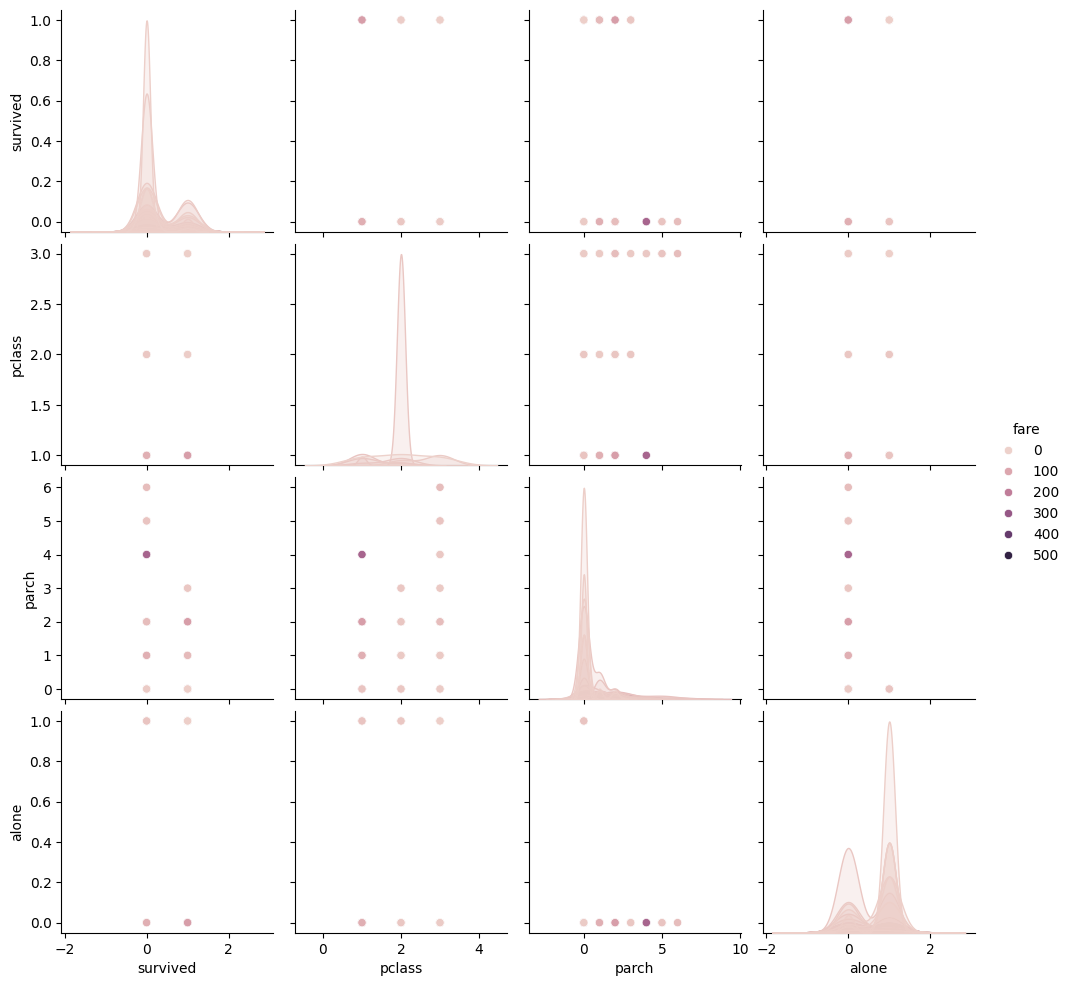

In [10]:
tb.plot_features_num_regression(train_set, target, umbral_corr = 0.2)

### 6.2. Para todas las variables numéricas que cumplan con el valor umbral y con pvalue = 0.05

['pclass', 'alone']

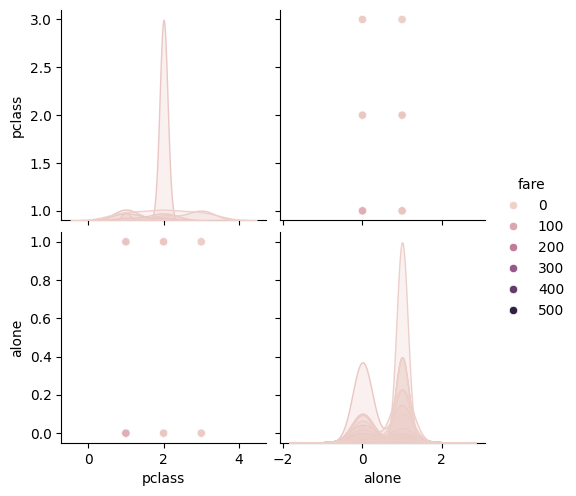

In [11]:
tb.plot_features_num_regression(train_set, target, umbral_corr = 0.25, pvalue = 0.05)

### 6.3. Para todas las variables numéricas seleccionadas

['survived', 'pclass', 'age']

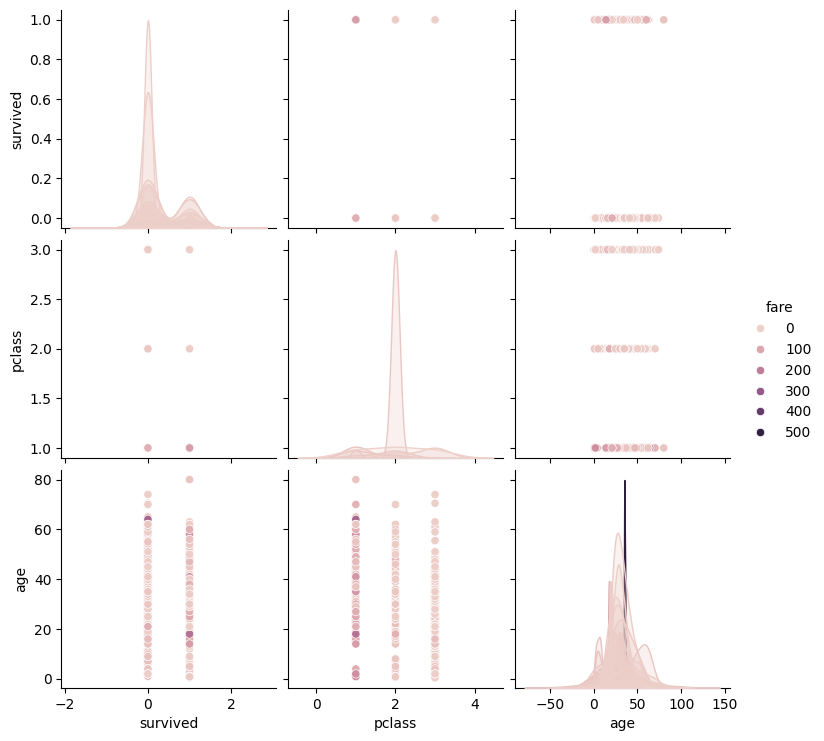

In [12]:
numerical_selected = ['survived', 'pclass', 'age']
tb.plot_features_num_regression(train_set, target, numerical_selected)

## 7. Obtenga las variables categóricas

In [13]:
tb.get_features_cat_regression(train_set, target, pvalue = 0.01)

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

## 8. Obtenga los histogramas de las variables

## 8.1. Histogramas de target en función de las variables categóricas

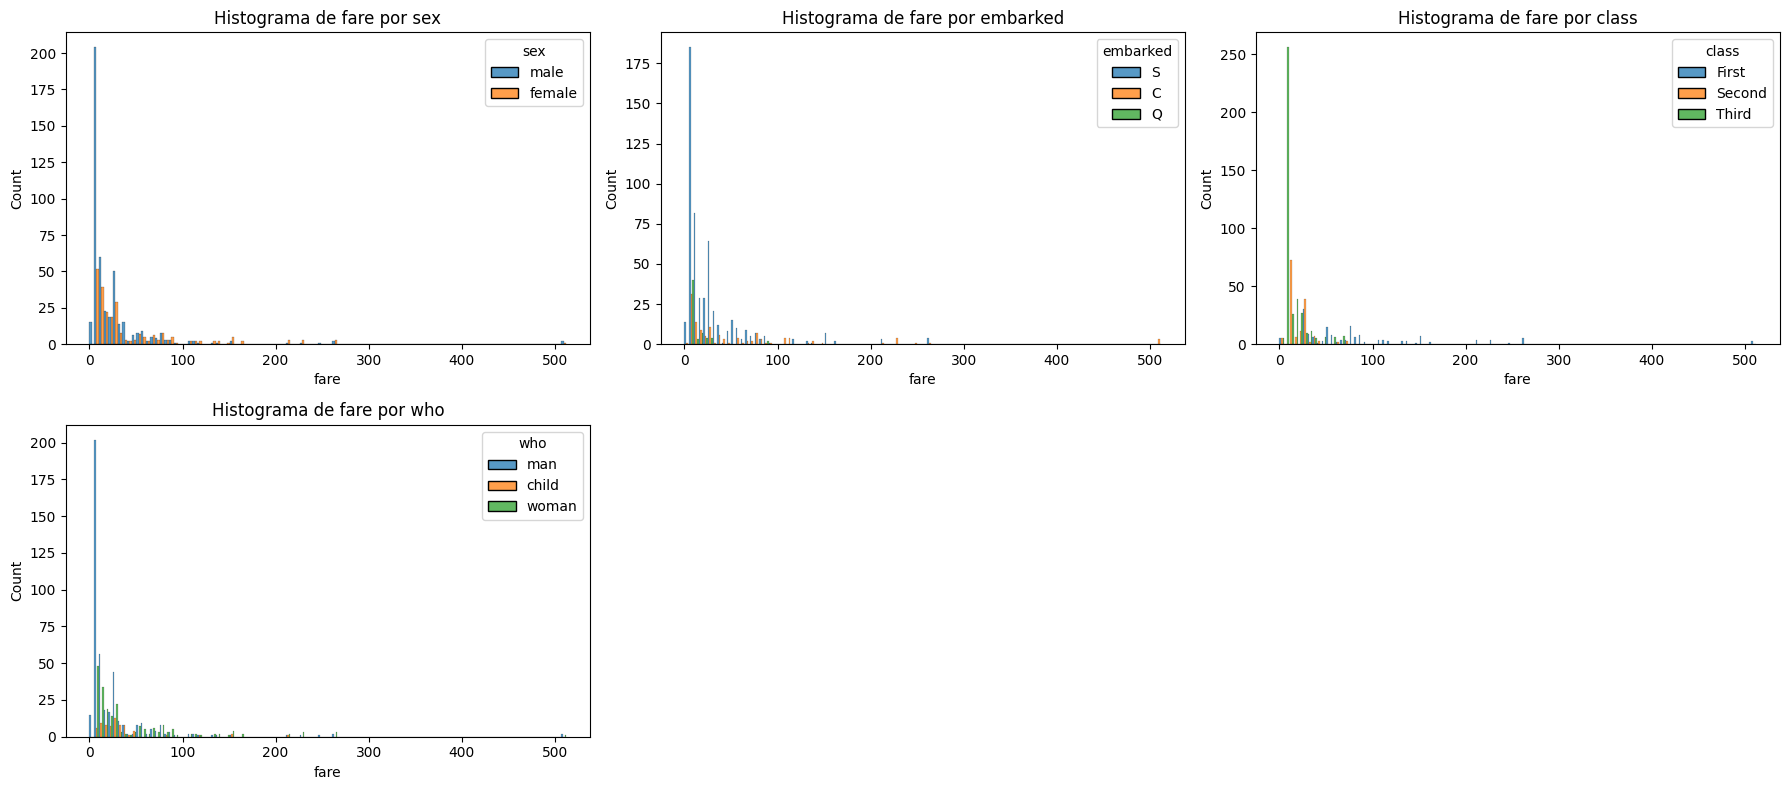

['sex', 'embarked', 'class', 'who']

In [14]:
categorical_selected = ['sex', 'embarked', 'class', 'who']
tb.plot_features_cat_regression(train_set, target, columns = categorical_selected, pvalue = 0.01)

## 8.2. Histogramas de variables numéricas con pvalue

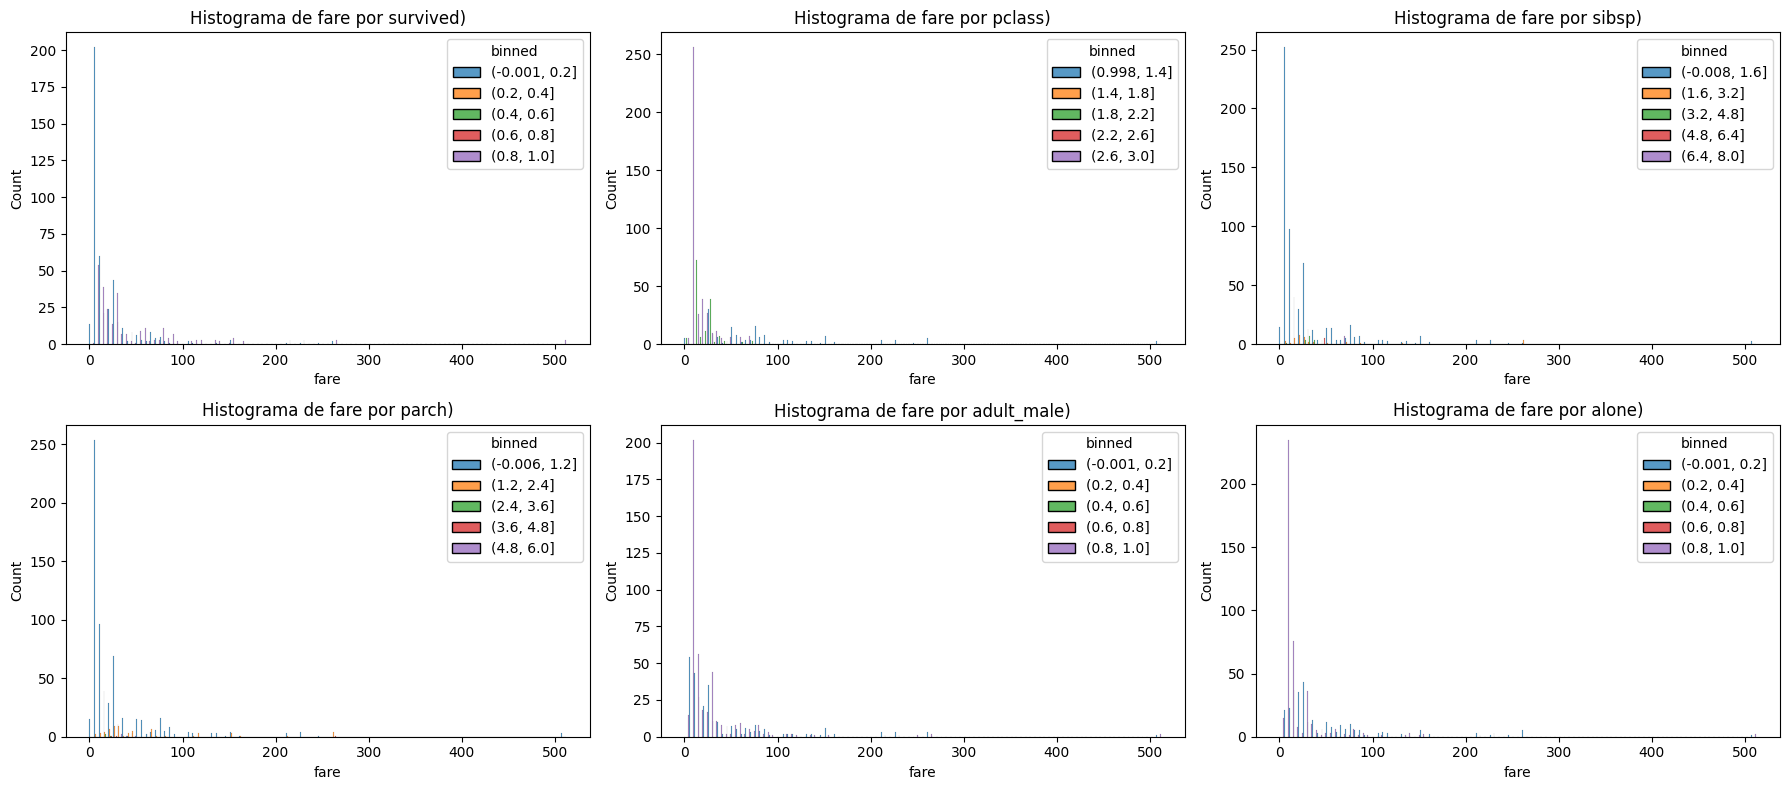

['survived', 'pclass', 'sibsp', 'parch', 'adult_male', 'alone']

In [15]:
tb.plot_features_cat_regression(train_set, target, pvalue = 0.05)

## 8.3. Histogramas individuales

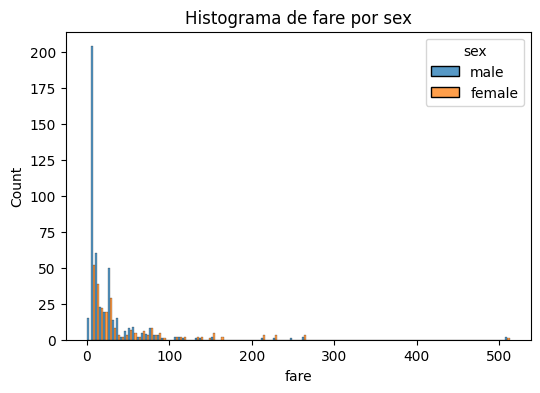

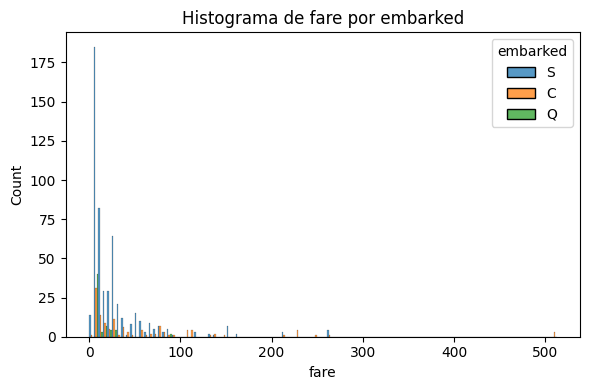

['sex', 'embarked']

In [16]:
tb.plot_features_cat_regression(train_set, target, ['sex', 'embarked'], with_individual_plot = True)